**NAMA : WIDIAWATI SIHALOHO**

**NIM : 24060122120037**

**LAB C-1**

**TUGAS PRAKTIKUM ML KE 2**

# **Clustering menggunakan dataset Iris**

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


**1. Import Dataset**

In [3]:
data = pd.read_csv('iris.csv')
print(data.shape)
print(data.head(20))

(150, 5)
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8

**Pilih fitur ke-2 dan ke-3**

In [4]:
X = data.iloc[:, [2, 3]].values

**2. Melakukan Clustering**

In [5]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42)
# Fitting input data
kmeans = kmeans.fit(X)
# Mendapatkan cluster labels
labels = kmeans.predict(X)
# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
# Mencetak nilai centroid
print(C)

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


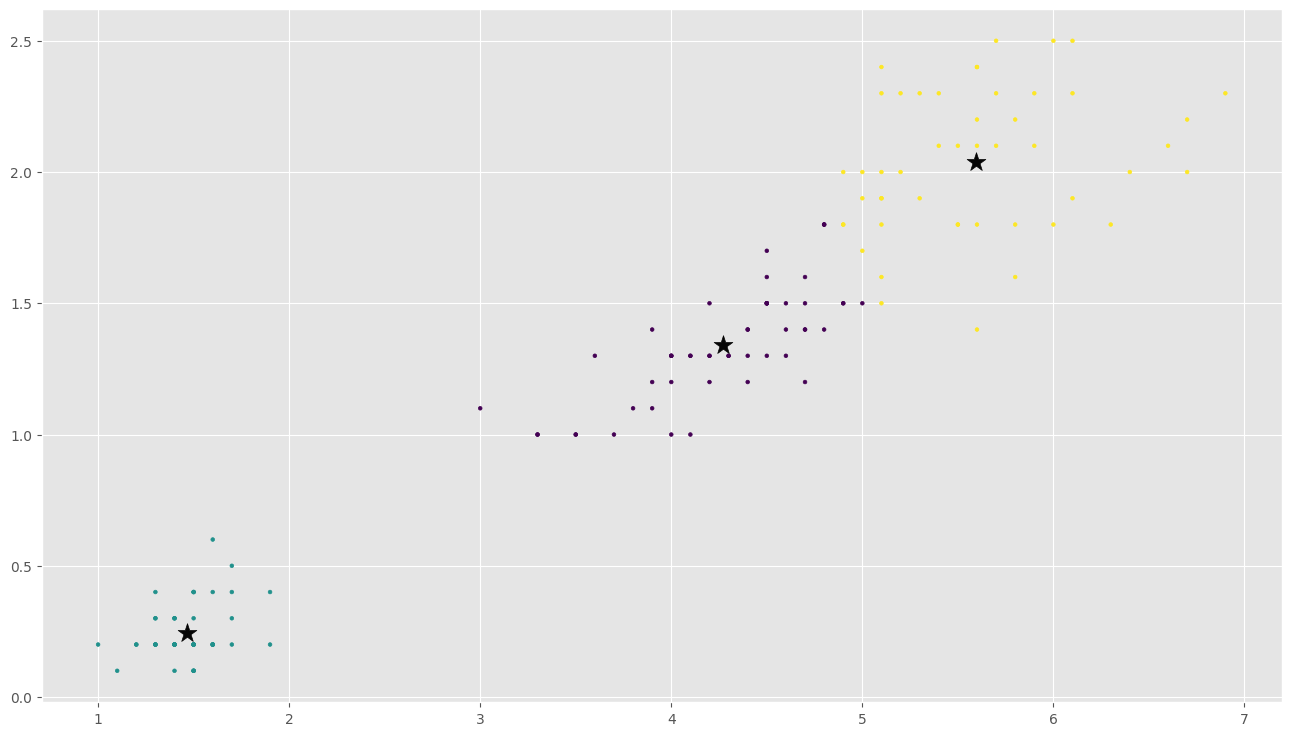

In [6]:
# Plot hasil clustering
plt.scatter(X[:, 0], X[:, 1], s=7, c=labels)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


**Penjelasan no 1 :**

Pada bagian ini, dataset Iris diimpor terlebih dahulu menggunakan pandas. Data yang digunakan adalah fitur ke-2 dan ke-3, yaitu panjang kelopak (petal length) dan lebar kelopak (petal width). Clustering dilakukan menggunakan algoritma K-Means dengan jumlah cluster ditentukan sebanyak tiga (3). Model K-Means di-fit ke data, dan hasil clustering berupa label cluster serta koordinat centroid diperoleh. Hasil clustering divisualisasikan dalam bentuk scatter plot, di mana setiap titik data diberi warna berdasarkan cluster yang teridentifikasi, sedangkan centroid ditampilkan sebagai tanda bintang (*)

#**Melakukan Evaluasi Hasil Clustering**

**Evaluasi hasil cluster menggunakan SSE**

In [7]:
for k in range(1, 10):
    # Menentukan jumlah cluster
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fitting input data
    kmeans = kmeans.fit(X)
    # Mendapatkan cluster labels
    labels = kmeans.predict(X)
    # Menghitung jumlah jarak antara setiap sampel dengan cluster centroid-nya (SSE)
    interia = kmeans.inertia_
    print("k:", k, " cost:", interia)
print("")


k: 1  cost: 550.6434666666671
k: 2  cost: 86.40394533570999
k: 3  cost: 31.38775897435898
k: 4  cost: 19.5196569076039
k: 5  cost: 16.485632449329845
k: 6  cost: 11.899967653148217
k: 7  cost: 9.325001966873709
k: 8  cost: 8.852027772305096
k: 9  cost: 7.02407987437399



Inertia atau Sum of Squared Errors (SSE) dihitung untuk mengevaluasi seberapa baik data terkelompokkan dalam cluster. Nilai SSE didapatkan dari properti .inertia_ pada model K-Means, yang mencerminkan jumlah jarak kuadrat antara setiap titik dengan centroid clusternya. Evaluasi ini dilakukan dengan mencoba berbagai jumlah cluster (k) dari 1 hingga 9 untuk melihat bagaimana nilai SSE berubah sesuai dengan jumlah cluster

**Evaluasi hasil cluster menggunakan silhouette coeficient**

In [8]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.41139704197387345

Silhouette Coefficient digunakan untuk mengevaluasi seberapa baik sebuah titik data berada di cluster yang benar. Nilainya berkisar antara -1 hingga 1, di mana nilai lebih tinggi menunjukkan clustering yang lebih baik. Fungsi silhouette_score dari sklearn digunakan untuk menghitung metrik ini berdasarkan label cluster yang dihasilkan dari K-Means dengan jumlah cluster (K=3)

#**Elbow Method**

In [9]:
%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
plt.style.use('seaborn-v0_8-whitegrid')
# Seaborn style on matplotlib plot, menentukan jenis graph. untuk jenis graph lain bisa dilihat di
# https://python-graph-gallery.com/199-matplotlib-style-sheets/
import numpy as np
from sklearn.cluster import KMeans


**Menentukan nilai yang tepat untuk cluster**

In [10]:

SSE = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

**Plot nilai K**

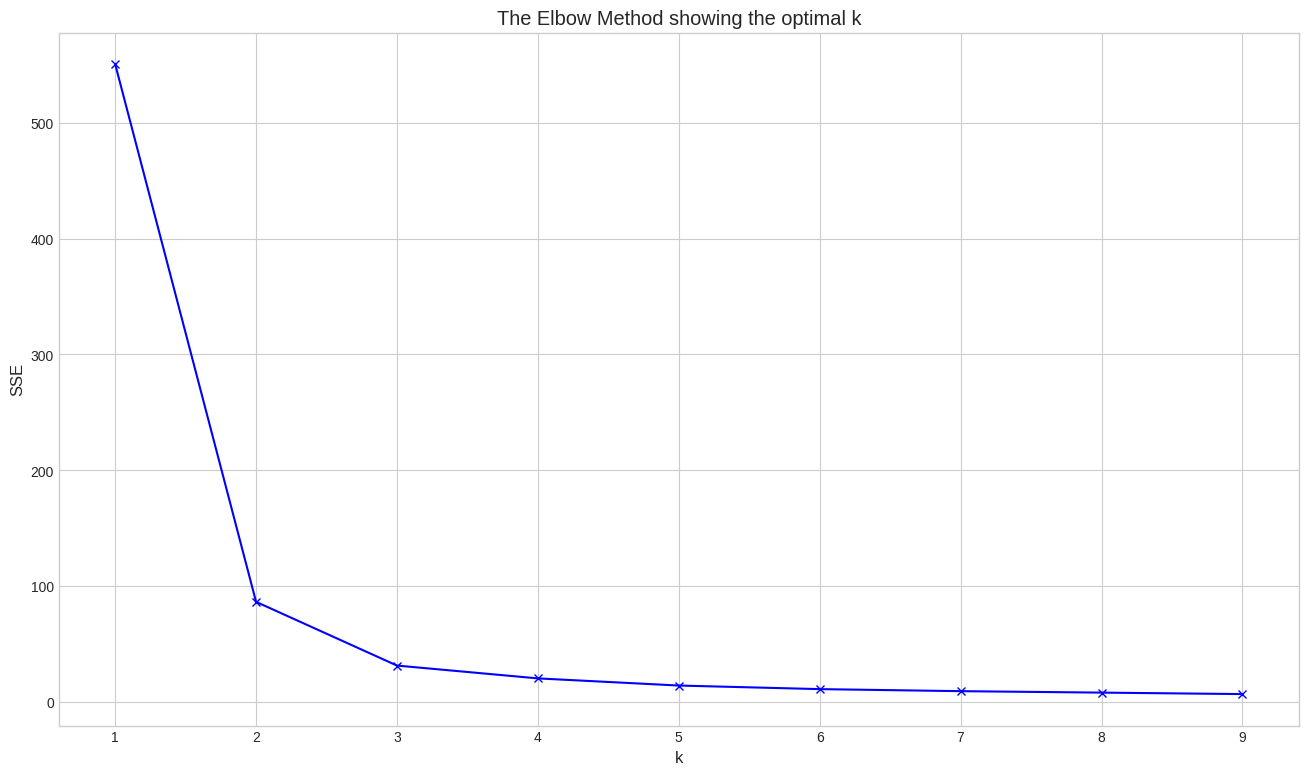

In [11]:
# Plot nilai K
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Penjelasan no 3:

Pada bagian ini, metode elbow digunakan untuk menentukan jumlah cluster optimal. SSE dihitung untuk berbagai nilai K (jumlah cluster) dari 1 hingga 9, kemudian nilai SSE diplot terhadap jumlah cluster. Grafik yang dihasilkan menunjukkan penurunan nilai SSE seiring bertambahnya jumlah cluster. Titik siku (elbow) pada grafik menunjukkan jumlah cluster optimal, yaitu jumlah K yang memberikan keseimbangan antara kompleksitas model (jumlah cluster) dan performa clustering

**Plot hasil cluster dengan nilai K yang dipilih dengan Scatterplot**

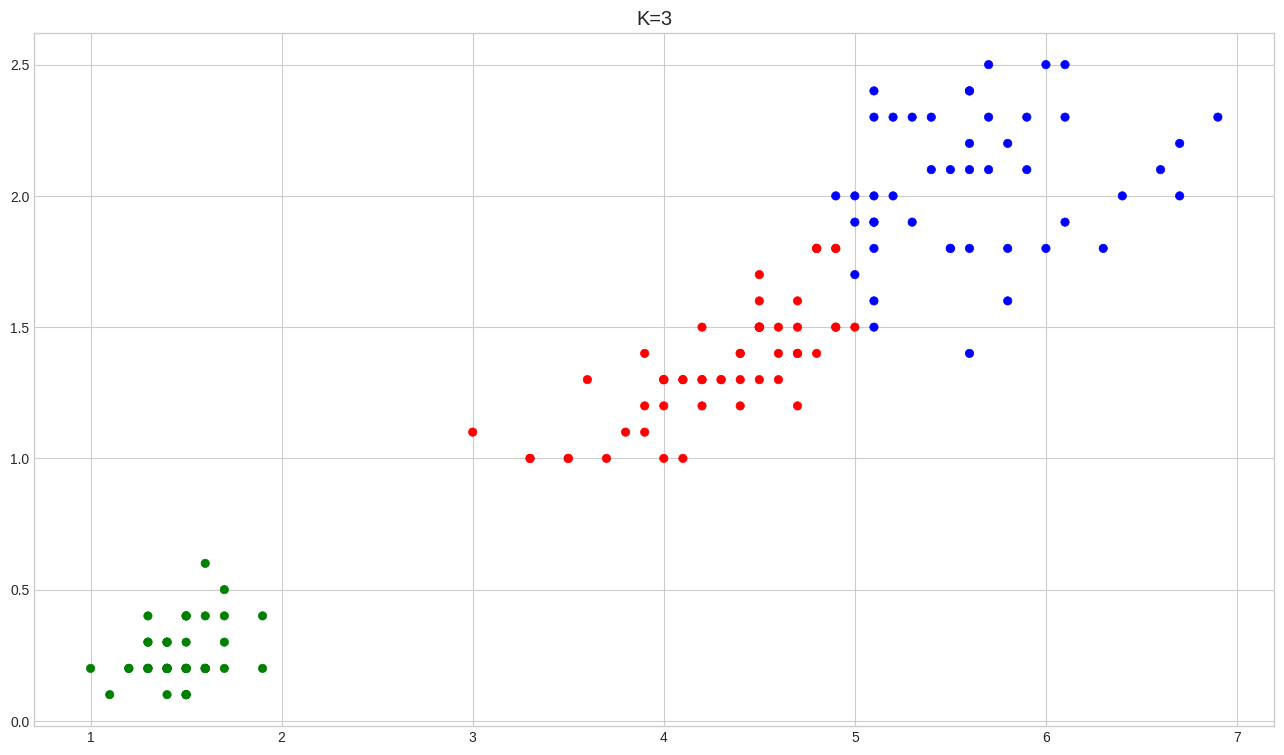

In [13]:
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X)

y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.plot()
LABEL_COLOR_MAP = {
    0: 'r',
    1: 'g',
    2: 'b'
}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=label_color)
plt.title("K=3")
plt.show()


Penjelasan no 4:

Setelah menentukan jumlah cluster optimal dari metode elbow (dalam hal ini K=3), hasil clustering divisualisasikan kembali dalam scatter plot. Data dikelompokkan berdasarkan label cluster dengan warna berbeda untuk setiap cluster. Scatter plot menampilkan pembagian data dalam tiga cluster yang dihasilkan oleh K-Means, memberikan gambaran visual tentang pola clustering